In [1]:
#문제1
from pyspark.sql import functions as F
df.groupby(df['year']).sum().show()

+----+----------+
year|sum(count)|
+----+----------+
2019| 1871935|
2018| 10124874|
+----+----------+

In [2]:
#문제2
from pyspark.sql import functions as F
df.groupby(df['year']).sum().show()
df.groupby(df['month']).sum().show()

+----+----------+
year|sum(count)|
+----+----------+
2019| 1871935|
2018| 10124874|
+----+----------+

+-----+----------+
month|sum(count)|
+-----+----------+
 07| 1100015|
 11| 961532|
 01| 659940|
 09| 1447993|
 05| 965609|
 08| 1037505|
 03| 1367480|
 02| 640284|
 06| 1207123|
 10| 1420621|
 12| 500822|
 04| 687885|
+-----+----------+

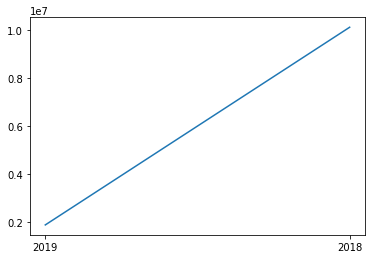

In [3]:
#문제 3번_01
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(year_grp), np.array(year_sum),'-')
plt.show()

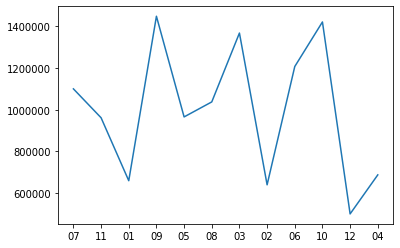

In [4]:
#문제 3번_02
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(month_grp), np.array(month_sum),'-')
plt.show()

In [5]:
df = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true', delimiter=',')\
        .load(os.path.join('/FileStore/tables','서울특별시_공공자전거_일별_대여건수__2018_2019_03___1_.csv'))

In [6]:
df.columns

Out[63]: ['�뿩����', '�뿩�Ǽ�']

In [7]:
df = df.drop('�뿩����').drop('�뿩�Ǽ�')

In [8]:
df = df.withColumn("date", df['�뿩����'])

In [9]:
df = df.withColumn("count", df['�뿩�Ǽ�'])

In [10]:
df.show()

+----------+-----+
 date|count|
+----------+-----+
2018-01-01| 4950|
2018-01-02| 7136|
2018-01-03| 7156|
2018-01-04| 7102|
2018-01-05| 7705|
2018-01-06| 5681|
2018-01-07| 5220|
2018-01-08| 6309|
2018-01-09| 5988|
2018-01-10| 4476|
2018-01-11| 4337|
2018-01-12| 4401|
2018-01-13| 3756|
2018-01-14| 4675|
2018-01-15| 6993|
2018-01-16| 7421|
2018-01-17| 6990|
2018-01-18| 7054|
2018-01-19| 8329|
2018-01-20| 6148|
+----------+-----+
only showing top 20 rows

In [11]:
from datetime import datetime
from pyspark.sql.functions import udf
from pyspark.sql.types import DateType
from pyspark.sql.functions import split
split_col = split(df['date'], '-')
split_col.getItem(1)

Out[101]: Column<b'split(date, -, -1)[1]'>

In [12]:
df=df.withColumn('month', split_col.getItem(1))
df=df.withColumn('year', split_col.getItem(0))

In [13]:
df.show()

+----------+-----+----+-----+
 date|count|year|month|
+----------+-----+----+-----+
2018-01-01| 4950|2018| 01|
2018-01-02| 7136|2018| 01|
2018-01-03| 7156|2018| 01|
2018-01-04| 7102|2018| 01|
2018-01-05| 7705|2018| 01|
2018-01-06| 5681|2018| 01|
2018-01-07| 5220|2018| 01|
2018-01-08| 6309|2018| 01|
2018-01-09| 5988|2018| 01|
2018-01-10| 4476|2018| 01|
2018-01-11| 4337|2018| 01|
2018-01-12| 4401|2018| 01|
2018-01-13| 3756|2018| 01|
2018-01-14| 4675|2018| 01|
2018-01-15| 6993|2018| 01|
2018-01-16| 7421|2018| 01|
2018-01-17| 6990|2018| 01|
2018-01-18| 7054|2018| 01|
2018-01-19| 8329|2018| 01|
2018-01-20| 6148|2018| 01|
+----------+-----+----+-----+
only showing top 20 rows

In [14]:
#문제1
from pyspark.sql import functions as F
df.groupby(df['year']).sum().show()

+----+----------+
year|sum(count)|
+----+----------+
2019| 1871935|
2018| 10124874|
+----+----------+

In [15]:
#문제2
import pandas as pd
from pyspark.sql import functions as F
df.groupby(df['year']).sum().show()
df.groupby(df['month']).sum().show()

+----+----------+
year|sum(count)|
+----+----------+
2019| 1871935|
2018| 10124874|
+----+----------+

+-----+----------+
month|sum(count)|
+-----+----------+
 07| 1100015|
 11| 961532|
 01| 659940|
 09| 1447993|
 05| 965609|
 08| 1037505|
 03| 1367480|
 02| 640284|
 06| 1207123|
 10| 1420621|
 12| 500822|
 04| 687885|
+-----+----------+

In [16]:
#문제2
from pyspark.sql import functions as F
year_bike=df.groupby(df['year']).sum()
month_bike=df.groupby(df['month']).sum()

In [17]:
year_grp=year_bike.rdd.map(lambda fields:fields[0]).collect()
year_sum=year_bike.rdd.map(lambda fields:fields[1]).collect()

In [18]:
month_grp=month_bike.rdd.map(lambda fields:fields[0]).collect()
month_sum=month_bike.rdd.map(lambda fields:fields[1]).collect()

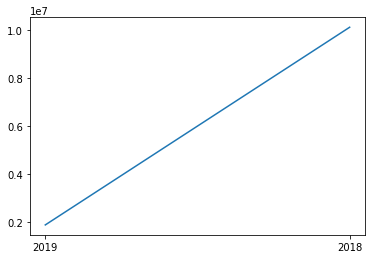

In [19]:
#문제 3번
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(year_grp), np.array(year_sum),'-')
plt.show()

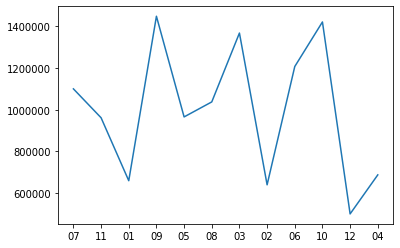

In [20]:
#문제 4번
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(month_grp), np.array(month_sum),'-')
plt.show()